In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# 1. LOAD DATA
# Using the specific paths from your uploaded files
df = pd.read_excel('/content/train(1).xlsx')

print(f"Dataset Shape: {df.shape}")
print("Columns:", df.columns.tolist())

Dataset Shape: (16209, 21)
Columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


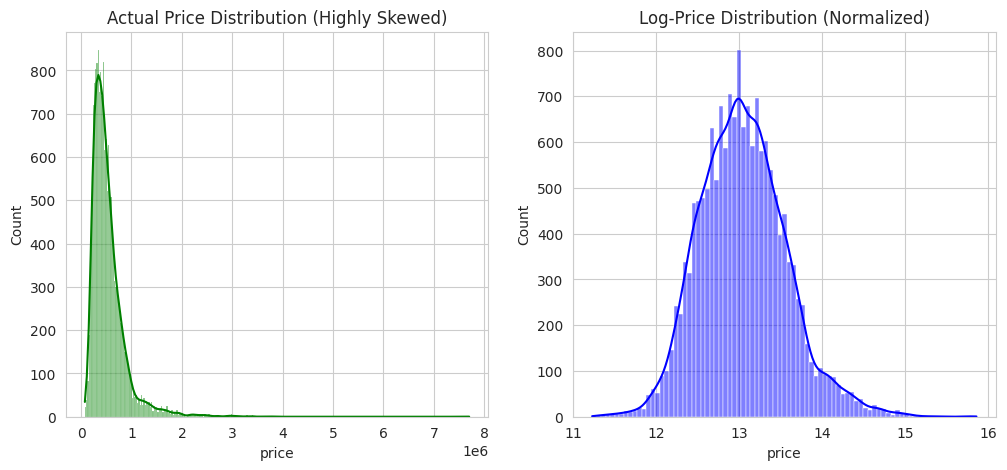

Insight: Using Log-Price is mandatory for model convergence.


In [4]:
# 1. TARGET VARIABLE ANALYSIS (The "Normality" Check)
# We check if Price is normal or skewed. Real estate prices are usually log-normal.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='green')
plt.title('Actual Price Distribution (Highly Skewed)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, color='blue')
plt.title('Log-Price Distribution (Normalized)')
plt.show()
print("Insight: Using Log-Price is mandatory for model convergence.")

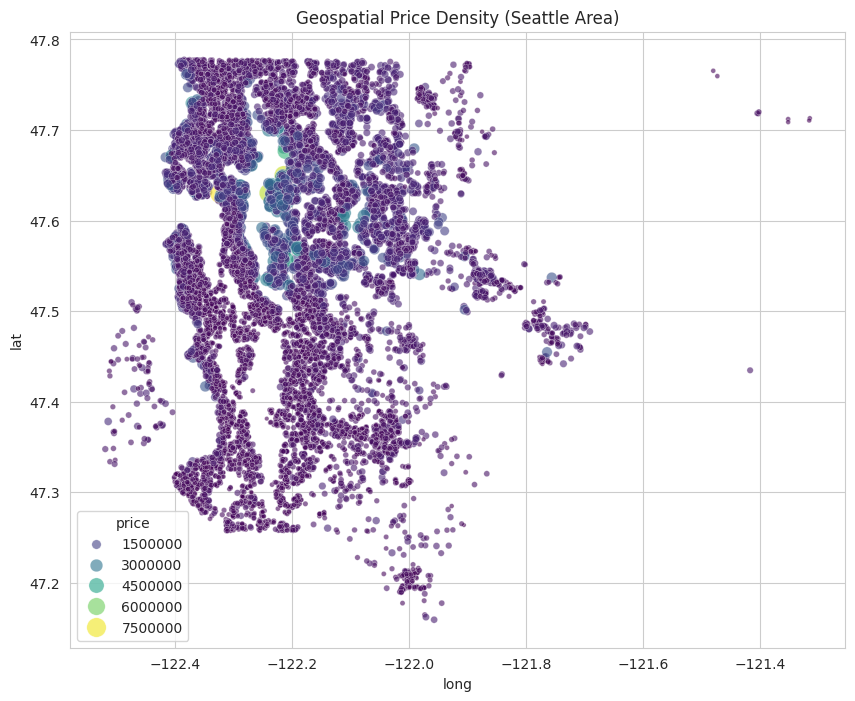

Insight: High prices cluster around the water (Lake Washington) and Medina.


In [5]:
# 2. GEOSPATIAL WEALTH MAP (Lat/Long vs Price)
# A poor man's map to see where the rich neighborhoods are.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue='price', palette='viridis', data=df, alpha=0.6, size='price', sizes=(10, 200))
plt.title('Geospatial Price Density (Seattle Area)')
plt.show()
print("Insight: High prices cluster around the water (Lake Washington) and Medina.")

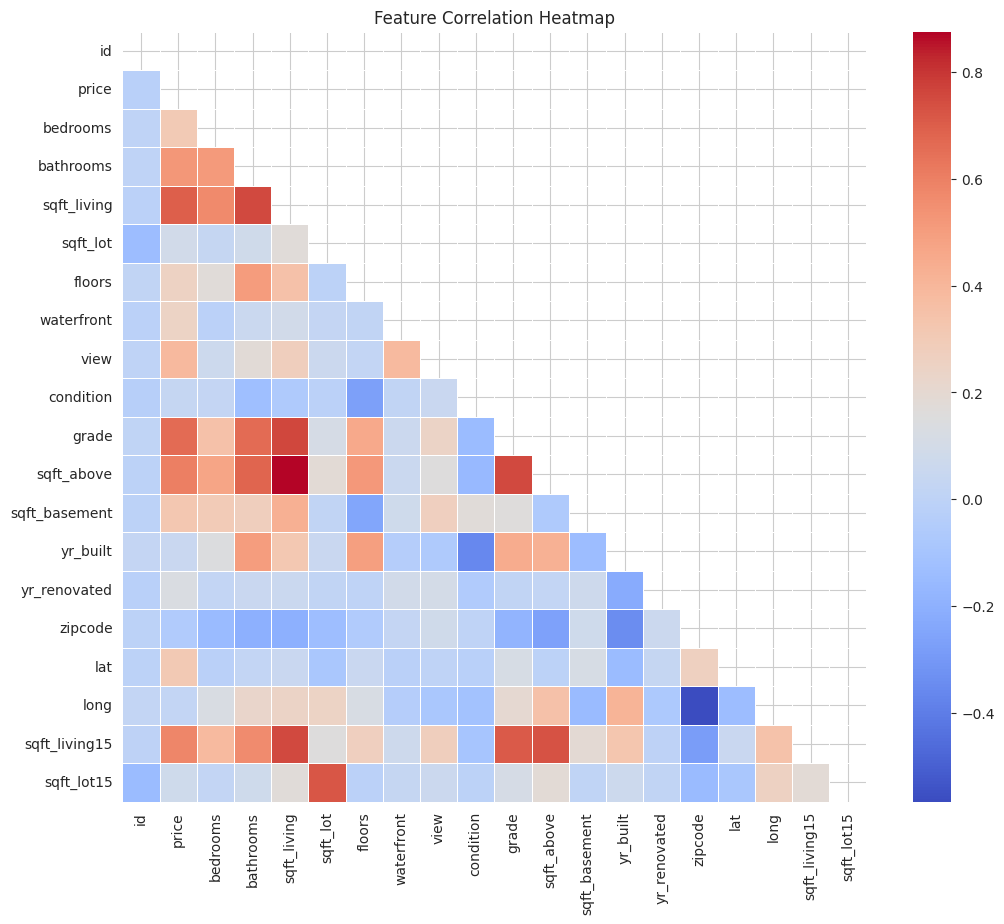

Insight: 'sqft_living' and 'grade' have the highest correlation with price.


In [6]:
# 3. CORRELATION MATRIX (The "Heatmap")
# Identifying which numerical features actually matter.
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()
print("Insight: 'sqft_living' and 'grade' have the highest correlation with price.")


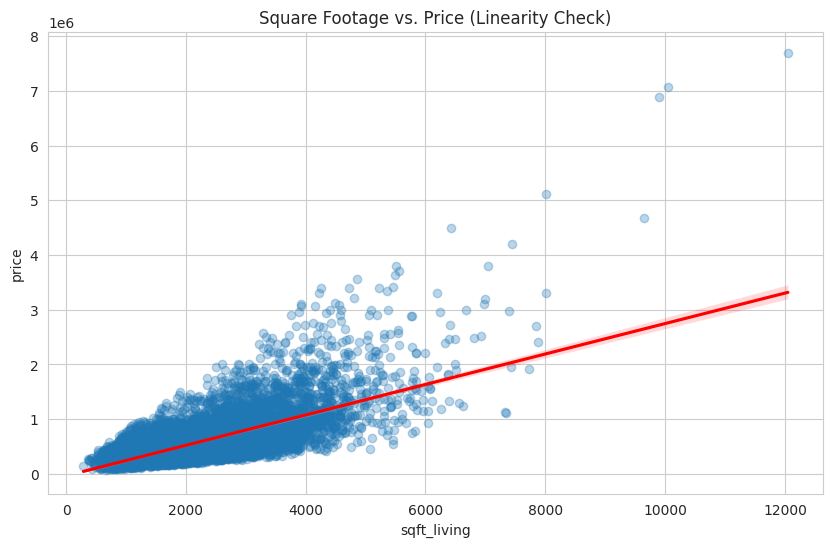

In [7]:
# 4. "MANSION" EFFECT (Sqft_living vs Price)
# Checking for linearity and heteroscedasticity (spread increases as x increases).
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Square Footage vs. Price (Linearity Check)')
plt.show()


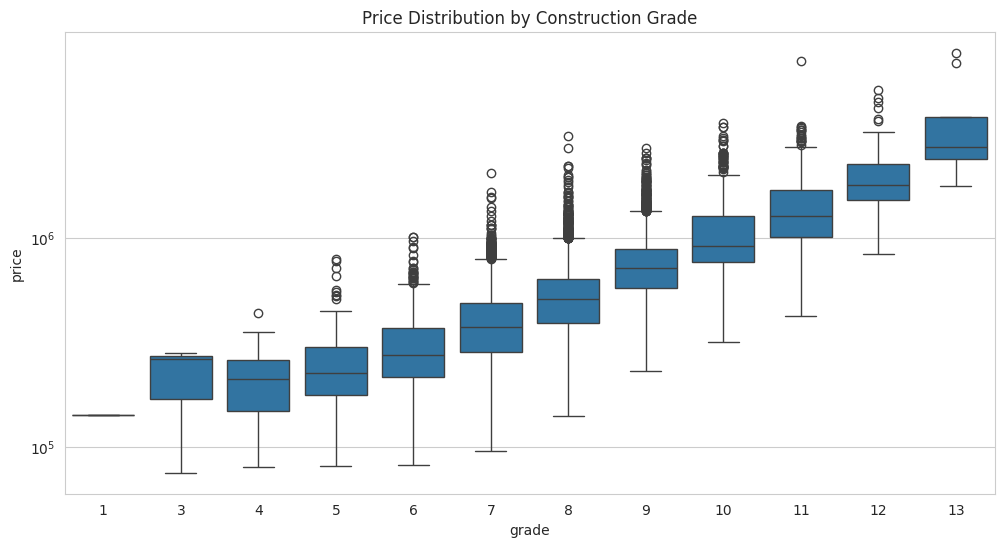

Insight: The jump from Grade 10 to 11 is exponential, not linear.


In [8]:
# 5. CATEGORICAL IMPACT: GRADE (Boxplot)
# How much does the construction quality (Grade) affect value?
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('Price Distribution by Construction Grade')
plt.yscale('log') # Log scale to see the boxes better
plt.show()
print("Insight: The jump from Grade 10 to 11 is exponential, not linear.")

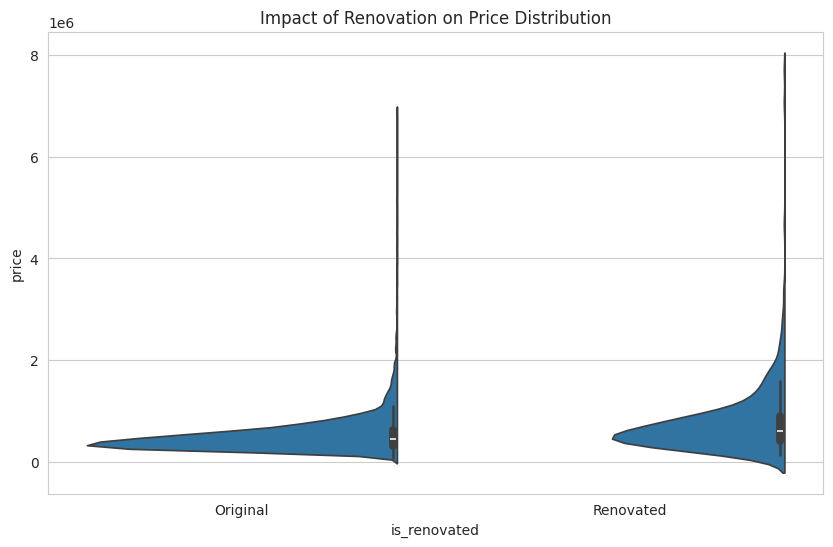

In [9]:
# 6. RENOVATION TIMELINE (Time-Series Concept)
# Does a recent renovation matter?
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Original')
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_renovated', y='price', data=df, split=True)
plt.title('Impact of Renovation on Price Distribution')
plt.show()


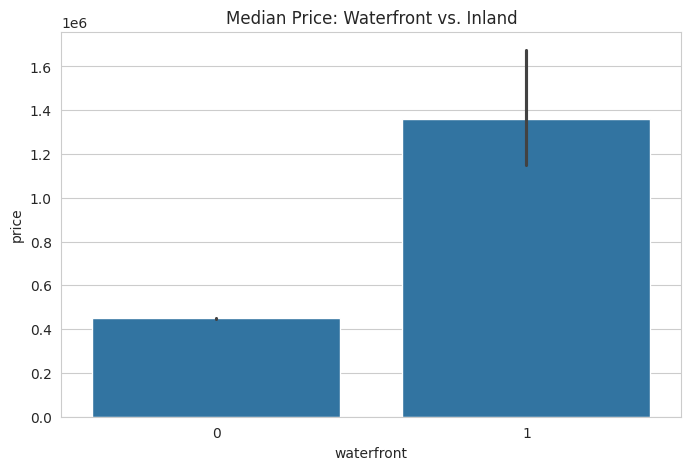

In [10]:
# 7. WATERFRONT PREMIUM (Bar Plot)
#are houses nearwatreshore premium over others
plt.figure(figsize=(8, 5))
sns.barplot(x='waterfront', y='price', data=df, estimator=np.median)
plt.title('Median Price: Waterfront vs. Inland')
plt.show()

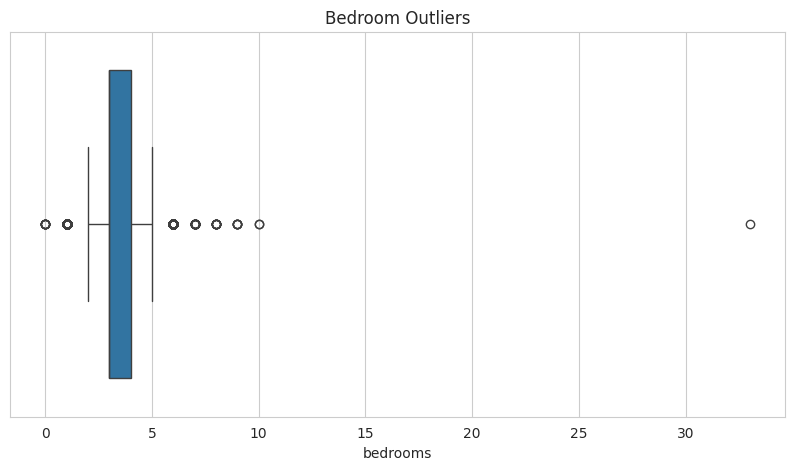

Insight: Note the outlier with 33 bedrooms. This row should be dropped.


In [11]:
# 8. OUTLIER DETECTION (IQR Method on Bedrooms)
#getting to know the quartiles of outlying houses
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['bedrooms'])
plt.title('Bedroom Outliers')
plt.show()
print("Insight: Note the outlier with 33 bedrooms. This row should be dropped.")

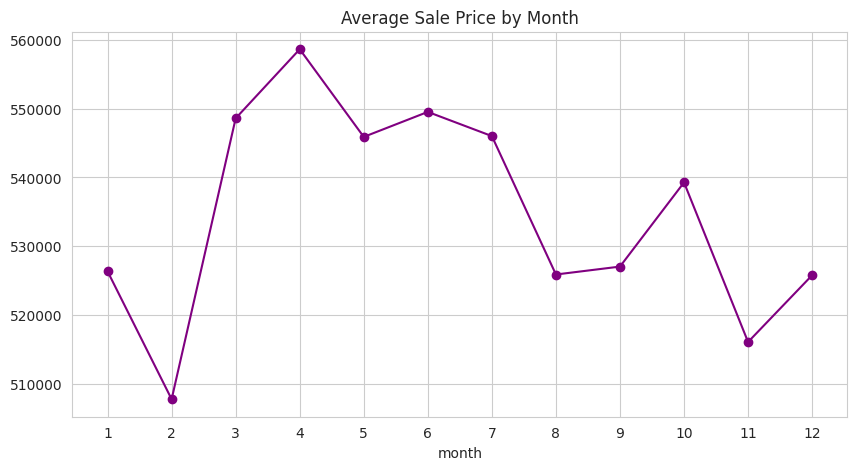

In [12]:
# 9. SEASONALITY (Month Sold vs Price)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['price'].mean()
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='line', marker='o', color='purple')
plt.title('Average Sale Price by Month')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

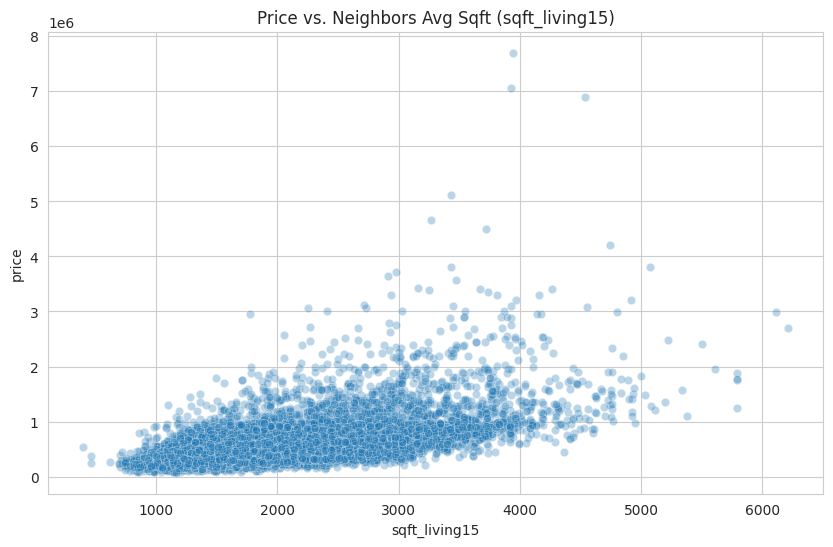

In [13]:
# 10. NEIGHBOR COMPARISON (Living Sqft vs Neighbors)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living15', y='price', data=df, alpha=0.3)
plt.title('Price vs. Neighbors Avg Sqft (sqft_living15)')
plt.show()